In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
# prompt: import from google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: load the dataset

# Assuming your dataset is in a CSV file named 'your_dataset.csv' in your Google Drive
data = pd.read_csv('/content/drive/MyDrive/waterQuality1.csv')

# Replace 'your_dataset.csv' with the actual path and filename of your dataset
# Print the first few rows to check if the data is loaded correctly
data.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
data.shape

(7999, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
data.query('ammonia == "#NUM!"')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [ ]:
data.query('is_safe == "#NUM!"')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [ ]:
data = data.drop(index=[7551, 7568, 7890], errors='ignore')

In [ ]:
data['ammonia'] = data['ammonia'].astype(float)
data['is_safe'] = data['is_safe'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [ ]:
data[data['is_safe'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,912.0,1.844079,1.596697,0.00,0.2200,1.5500,3.2725,5.00
ammonia,912.0,13.711096,8.634490,-0.01,6.4475,12.4700,21.1925,29.80
arsenic,912.0,0.074624,0.159653,0.00,0.0200,0.0300,0.0400,1.03
barium,912.0,1.875888,1.203775,0.00,0.7975,1.7400,2.8900,4.53
cadmium,912.0,0.017081,0.028027,0.00,0.0030,0.0060,0.0090,0.13
chloramine,912.0,3.513355,2.448520,0.00,1.2525,3.4350,5.6400,8.66
chromium,912.0,0.384814,0.276194,0.00,0.1100,0.3600,0.6200,0.90
copper,912.0,0.859671,0.627925,0.00,0.2675,0.8100,1.4200,1.99
flouride,912.0,0.779594,0.428040,0.00,0.4300,0.7850,1.1425,1.50
bacteria,912.0,0.299441,0.319688,0.00,0.0000,0.2000,0.5800,1.00


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data[data['is_safe'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7084.0,0.514780,1.130361,0.000,0.030,0.070,0.1100,5.05
ammonia,7084.0,14.351222,8.907884,-0.080,6.600,14.340,22.2400,29.84
arsenic,7084.0,0.172659,0.260127,0.000,0.030,0.060,0.1000,1.05
barium,7084.0,1.528281,1.212233,0.000,0.530,1.100,2.4200,4.94
cadmium,7084.0,0.046115,0.035633,0.000,0.010,0.040,0.0800,0.13
chloramine,7084.0,2.005621,2.531550,0.000,0.090,0.410,3.8425,8.68
chromium,7084.0,0.229596,0.264824,0.000,0.040,0.080,0.4000,0.90
copper,7084.0,0.799023,0.656550,0.000,0.090,0.740,1.3900,2.00
flouride,7084.0,0.770623,0.436384,0.000,0.400,0.760,1.1600,1.50
bacteria,7084.0,0.322324,0.330670,0.000,0.000,0.220,0.6100,1.00


from matplotlib import pyplot as plt
_df_16['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_28['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

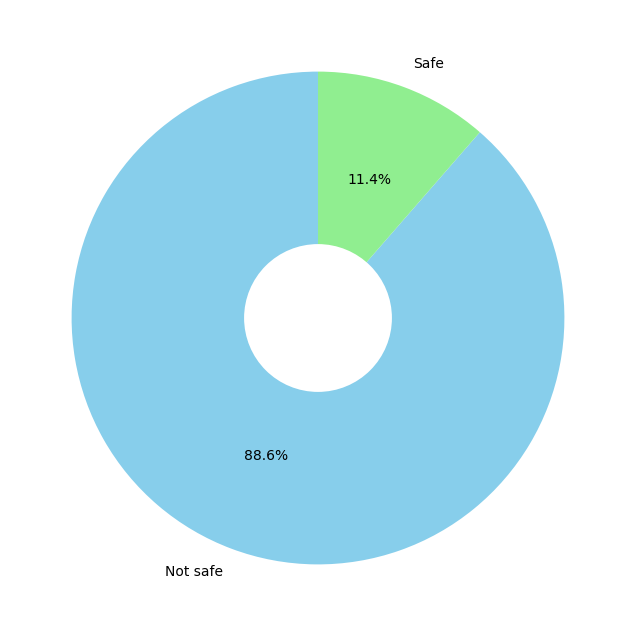

In [ ]:
# Get the value counts
counting = data['is_safe'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(counting, labels=['Not safe','Safe'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.gca().add_artist(plt.Circle((0,0),0.30,fc='white')) # Donut Hole')
plt.show()

In [ ]:
# prompt: explain in deatil about above piechart'

# The pie chart visualizes the distribution of the 'is_safe' variable in the dataset.

# Key Observations:

# 1. Categories: The chart displays two categories:
#    - Not safe (represented by a skyblue color)
#    - Safe (represented by a lightgreen color)


# 2. Proportion: The size of each slice represents the percentage of occurrences of each category.
#    -  Based on the piechart, the water is not safe for more than 50%.


# 3. Central Hole: A white circle in the center creates a donut-shaped pie chart, which improves readability and clarifies that the chart illustrates proportions of the total dataset rather than a single-entity value.


# 4. Inference: This piechart reveals the distribution of water safety in the dataset. It shows the imbalance in the number of samples in each category.





In [ ]:
# prompt: give me description  in para about the dataset

print("The dataset appears to contain information related to water quality, with a primary focus on whether the water is considered safe for consumption or use. It likely includes various features or measurements that contribute to this assessment, such as chemical components (e.g., ammonia levels). The dataset has a significant imbalance in the 'is_safe' category, with a majority of samples indicating that the water is not safe.  Further analysis of the dataset could provide insights into the specific factors influencing water safety and potential patterns or trends in the data.")


The dataset appears to contain information related to water quality, with a primary focus on whether the water is considered safe for consumption or use. It likely includes various features or measurements that contribute to this assessment, such as chemical components (e.g., ammonia levels). The dataset has a significant imbalance in the 'is_safe' category, with a majority of samples indicating that the water is not safe.  Further analysis of the dataset could provide insights into the specific factors influencing water safety and potential patterns or trends in the data.


In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['is_safe'], axis=1),
    data['is_safe'],
    test_size = 1/3,
    random_state = 123
)

In [ ]:
predictors_train.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
4388,0.05,28.30,0.10,0.31,0.090,0.09,0.07,0.09,1.05,0.00,0.580,0.006,6.03,0.55,0.003,5.11,2.86,0.04,0.04,0.01
6944,0.05,24.34,0.07,0.27,0.040,0.06,0.01,1.27,1.25,0.75,0.750,0.076,7.49,1.32,0.008,4.92,0.83,0.01,0.02,0.08
586,4.49,3.08,0.01,3.28,0.002,7.43,0.29,1.67,0.47,0.54,0.540,0.141,4.94,1.64,0.006,45.28,0.80,0.04,0.40,0.03
4686,0.02,5.58,0.08,0.13,0.060,0.49,0.06,0.04,0.62,0.00,0.005,0.006,9.58,0.32,0.003,3.88,4.56,0.02,0.02,0.03
347,0.43,28.46,0.01,2.88,0.007,6.62,0.17,0.75,1.29,0.18,0.001,0.134,12.33,1.12,0.005,41.00,3.39,0.08,0.40,0.05


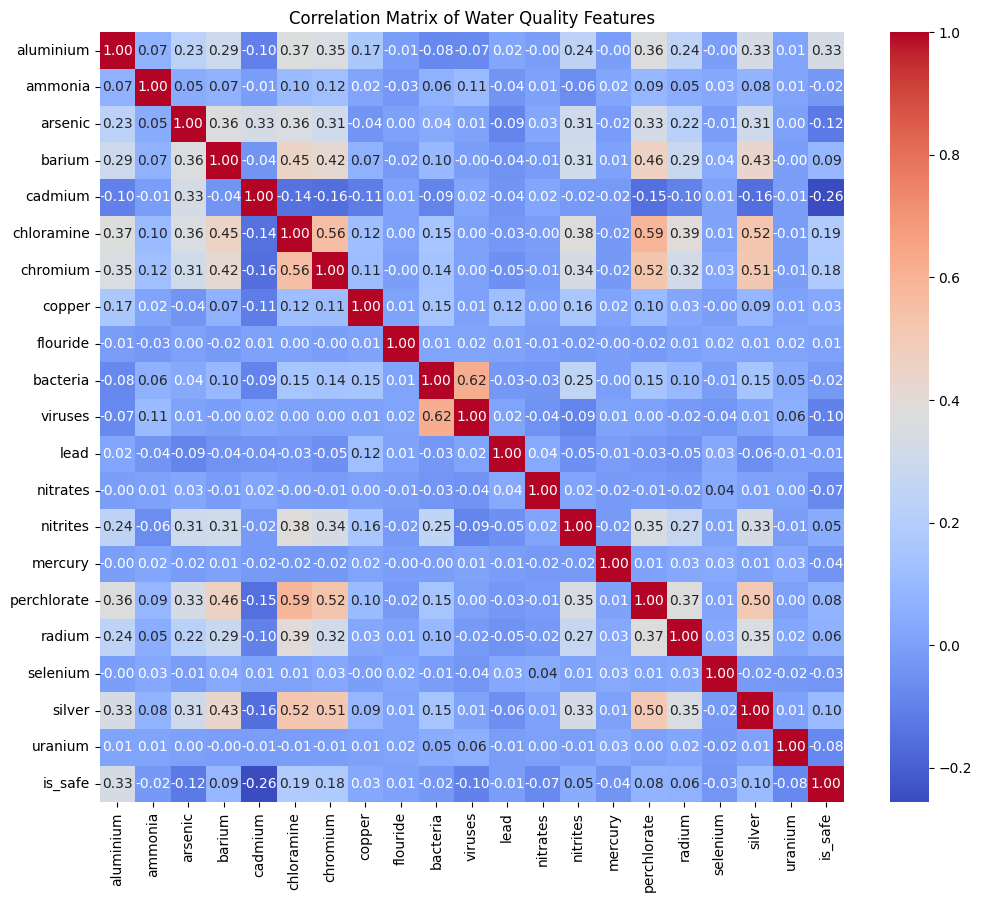

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


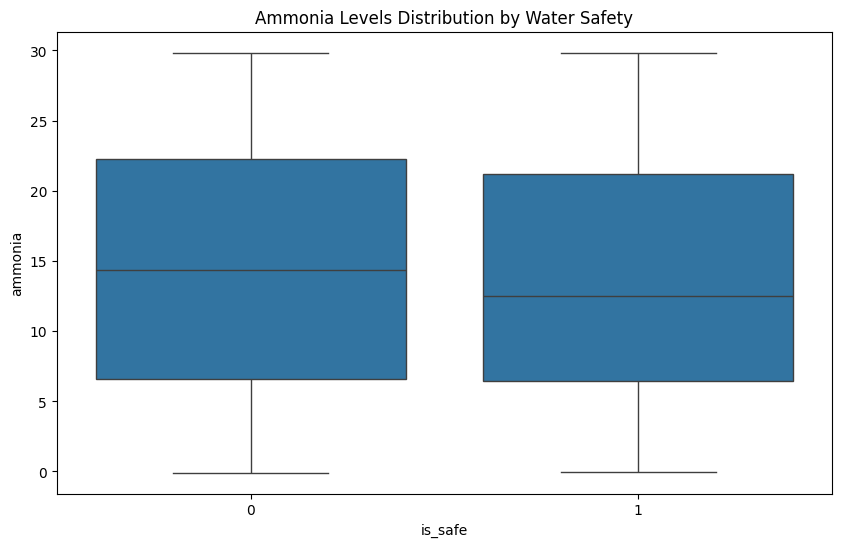

In [ ]:
# prompt: give me explanatory analysis for above what i have done in 2 or 3 rows graphcially

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Quality Features')
plt.show()

# Distribution of 'is_safe' by 'ammonia'
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_safe', y='ammonia', data=data)
plt.title('Ammonia Levels Distribution by Water Safety')
plt.show()


In [ ]:
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)

In [ ]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph.render('decision-tree')

'decision-tree.pdf'

In [ ]:
target_predicted = model.predict(predictors_test)


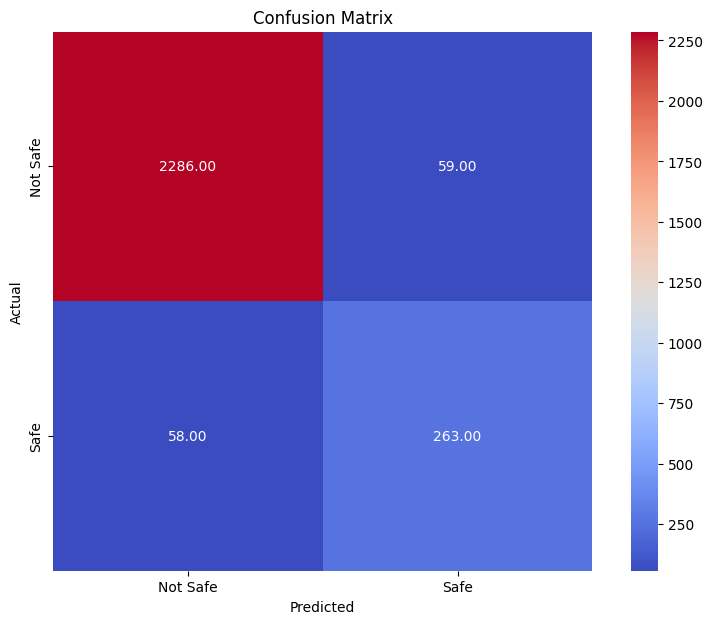

In [ ]:
cm = confusion_matrix(target_test, target_predicted)
class_names = ['Not Safe', 'Safe']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accur = accuracy_score(target_test, target_predicted)

print(f'The model has {round(100 * accur,2)}% of accuracy')

The model has 95.61% of accuracy


The Random Forest model has 95.12% of accuracy


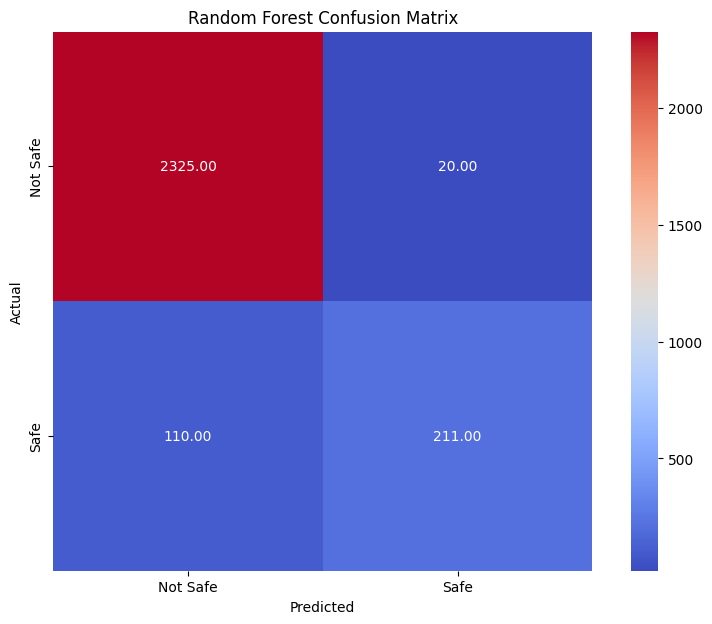

In [ ]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(predictors_train, target_train)

# Make predictions on the test set
rf_target_predicted = rf_model.predict(predictors_test)

# Evaluate the model
rf_cm = confusion_matrix(target_test, rf_target_predicted)
rf_accur = accuracy_score(target_test, rf_target_predicted)

print(f'The Random Forest model has {round(100 * rf_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


The SVM model has 89.8% of accuracy


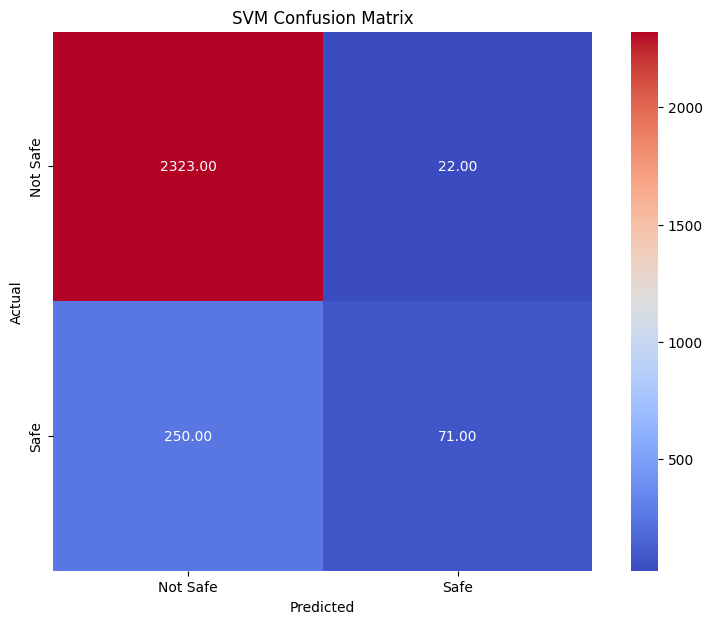

In [ ]:
# prompt: apply svm

from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(predictors_train, target_train)

# Make predictions on the test set
svm_target_predicted = svm_model.predict(predictors_test)

# Evaluate the model
svm_cm = confusion_matrix(target_test, svm_target_predicted)
svm_accur = accuracy_score(target_test, svm_target_predicted)

print(f'The SVM model has {round(100 * svm_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


The Hybrid model has 95.8% of accuracy


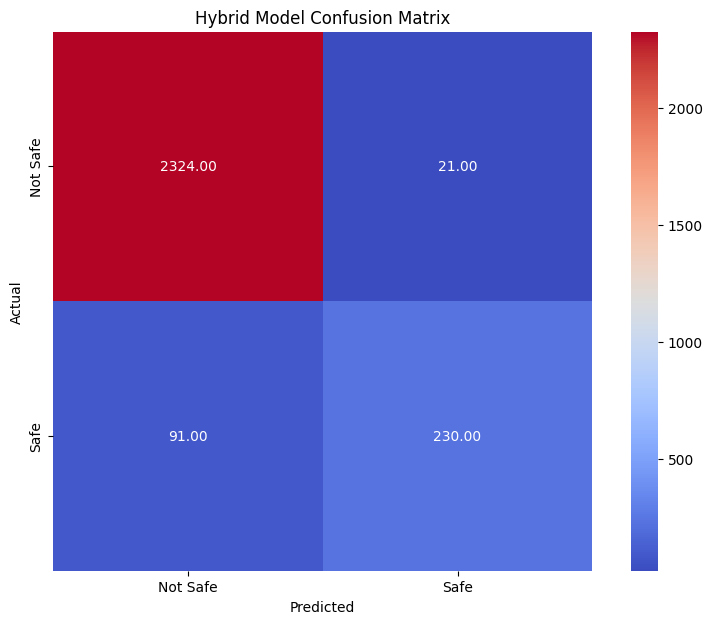

In [ ]:
# prompt: apply hybrid mdels

from sklearn.ensemble import VotingClassifier

# Create individual models
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_svm = SVC(kernel='linear', probability=True, random_state=42)

# Create a voting classifier with 'soft' voting (using probabilities)
hybrid_model = VotingClassifier(estimators=[
    ('decision_tree', model_dt),
    ('random_forest', model_rf),
    ('svm', model_svm)
], voting='soft')


# Train the hybrid model
hybrid_model.fit(predictors_train, target_train)

# Make predictions on the test set
hybrid_target_predicted = hybrid_model.predict(predictors_test)

# Evaluate the hybrid model
hybrid_cm = confusion_matrix(target_test, hybrid_target_predicted)
hybrid_accur = accuracy_score(target_test, hybrid_target_predicted)

print(f'The Hybrid model has {round(100 * hybrid_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(hybrid_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Hybrid Model Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The AdaBoost model has 92.91% of accuracy


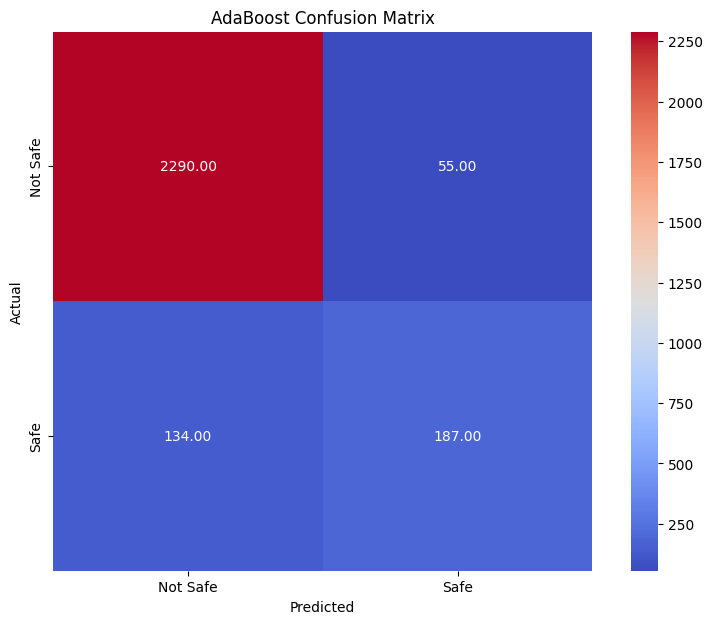

The Gradient Boosting model has 95.84% of accuracy


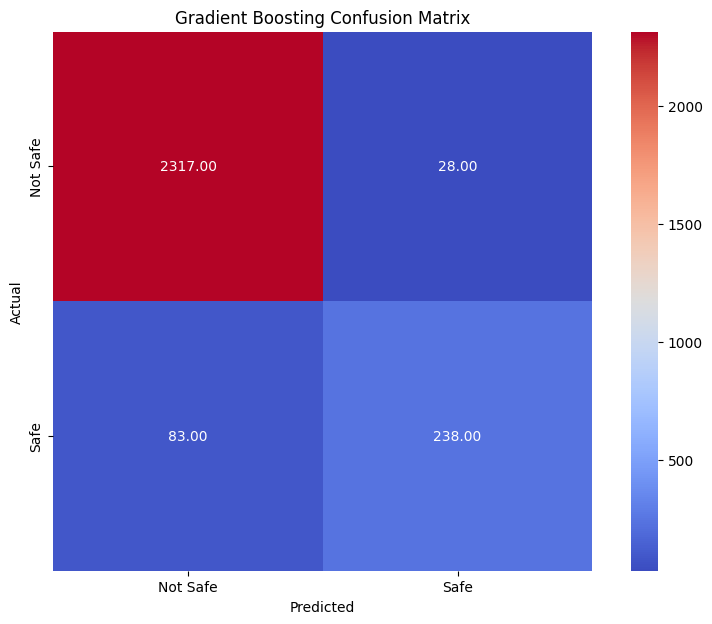

In [ ]:
# prompt: apply boosting models

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoost classifier
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # You can adjust the base estimator and its parameters
    n_estimators=50,  # Number of weak learners (trees)
    learning_rate=1.0,
    random_state=42
)

# Train the AdaBoost model
adaboost_model.fit(predictors_train, target_train)

# Make predictions on the test set
adaboost_target_predicted = adaboost_model.predict(predictors_test)

# Evaluate the AdaBoost model
adaboost_cm = confusion_matrix(target_test, adaboost_target_predicted)
adaboost_accur = accuracy_score(target_test, adaboost_target_predicted)

print(f'The AdaBoost model has {round(100 * adaboost_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(adaboost_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix')
plt.show()


# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,
    max_depth=3,  # Maximum depth of each tree
    random_state=42
)

# Train the Gradient Boosting model
gb_model.fit(predictors_train, target_train)

# Make predictions on the test set
gb_target_predicted = gb_model.predict(predictors_test)

# Evaluate the Gradient Boosting model
gb_cm = confusion_matrix(target_test, gb_target_predicted)
gb_accur = accuracy_score(target_test, gb_target_predicted)

print(f'The Gradient Boosting model has {round(100 * gb_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(gb_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The Combined Boosting model has 95.72% of accuracy


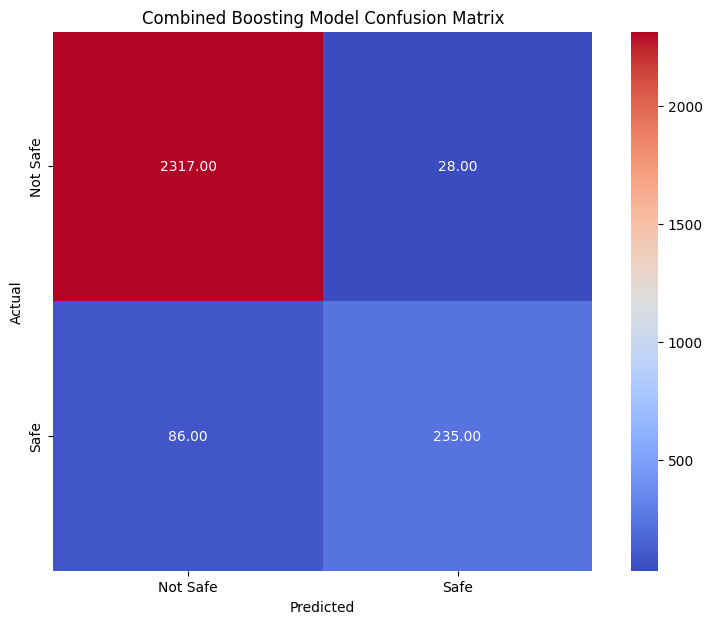

In [ ]:
# prompt: combine all boosting models

from sklearn.ensemble import VotingClassifier

# Create individual boosting models
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Create a voting classifier with 'soft' voting (using probabilities)
combined_boosting_model = VotingClassifier(estimators=[
    ('adaboost', adaboost_model),
    ('gradient_boosting', gb_model)
], voting='soft')

# Train the combined boosting model
combined_boosting_model.fit(predictors_train, target_train)

# Make predictions on the test set
combined_boosting_target_predicted = combined_boosting_model.predict(predictors_test)

# Evaluate the combined boosting model
combined_boosting_cm = confusion_matrix(target_test, combined_boosting_target_predicted)
combined_boosting_accur = accuracy_score(target_test, combined_boosting_target_predicted)

print(f'The Combined Boosting model has {round(100 * combined_boosting_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(combined_boosting_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Combined Boosting Model Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8732 - loss: 0.3846 - val_accuracy: 0.9128 - val_loss: 0.2580
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8814 - loss: 0.3106 - val_accuracy: 0.9137 - val_loss: 0.2252
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8880 - loss: 0.2864 - val_accuracy: 0.9174 - val_loss: 0.2429
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.2768 - val_accuracy: 0.9165 - val_loss: 0.2520
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8944 - loss: 0.2734 - val_accuracy: 0.9287 - val_loss: 0.2078
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8997 - loss: 0.2512 - val_accuracy: 0.9250 - val_loss: 0.1977
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8969 - loss: 0.2511 - val_accuracy: 0.9278 - val_loss: 0.1913
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8992 - loss: 0.2540 - val_accuracy: 0.

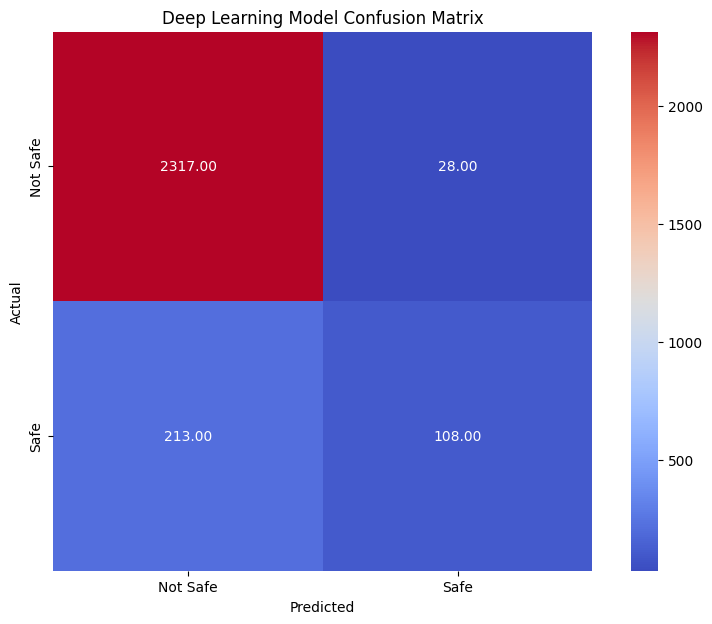

In [ ]:
# prompt: apply deep learning models

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(predictors_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (is_safe)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(predictors_train, target_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(predictors_test, target_test)
print(f"Deep Learning Model Accuracy: {round(accuracy * 100, 2)}%")

# Make predictions
dl_target_predicted = (model.predict(predictors_test) > 0.5).astype(int)

# Evaluate the deep learning model
dl_cm = confusion_matrix(target_test, dl_target_predicted)

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(dl_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Deep Learning Model Confusion Matrix')
plt.show()


The Bagging-Gradient Boosting model has 95.5% of accuracy


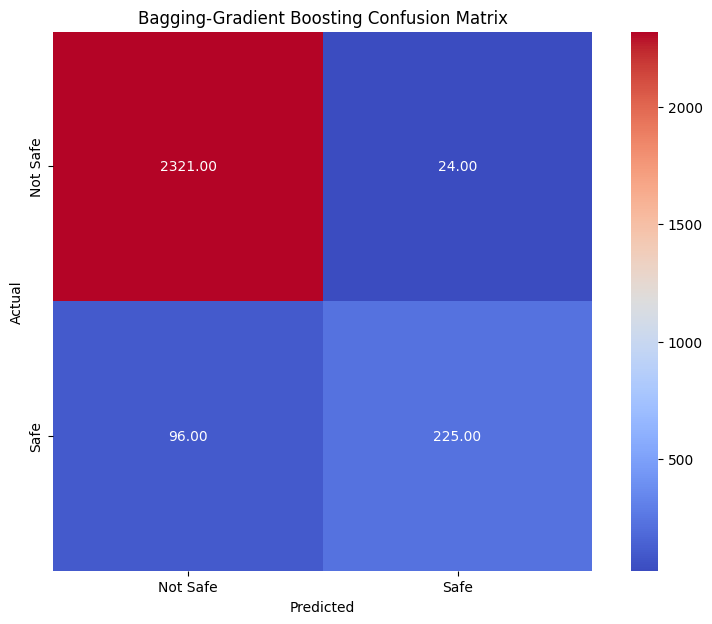

In [ ]:
# prompt: combine bagging and gradient

from sklearn.ensemble import BaggingClassifier

# Create a Bagging Classifier with a Gradient Boosting base estimator
bagging_gb_model = BaggingClassifier(
    estimator=GradientBoostingClassifier( # Changed 'base_estimator' to 'estimator'
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    n_estimators=10,  # Number of base estimators (Gradient Boosting models)
    random_state=42
)

# Train the Bagging-Gradient Boosting model
bagging_gb_model.fit(predictors_train, target_train)

# Make predictions on the test set
bagging_gb_target_predicted = bagging_gb_model.predict(predictors_test)

# Evaluate the Bagging-Gradient Boosting model
bagging_gb_cm = confusion_matrix(target_test, bagging_gb_target_predicted)
bagging_gb_accur = accuracy_score(target_test, bagging_gb_target_predicted)

print(f'The Bagging-Gradient Boosting model has {round(100 * bagging_gb_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(bagging_gb_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bagging-Gradient Boosting Confusion Matrix')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 591, number of negative: 4739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 5330, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110882 -> initscore=-2.081765
[LightGBM] [Info] Start training from score -2.081765
The Combined LightGBM and CatBoost model has 97.34% of accuracy


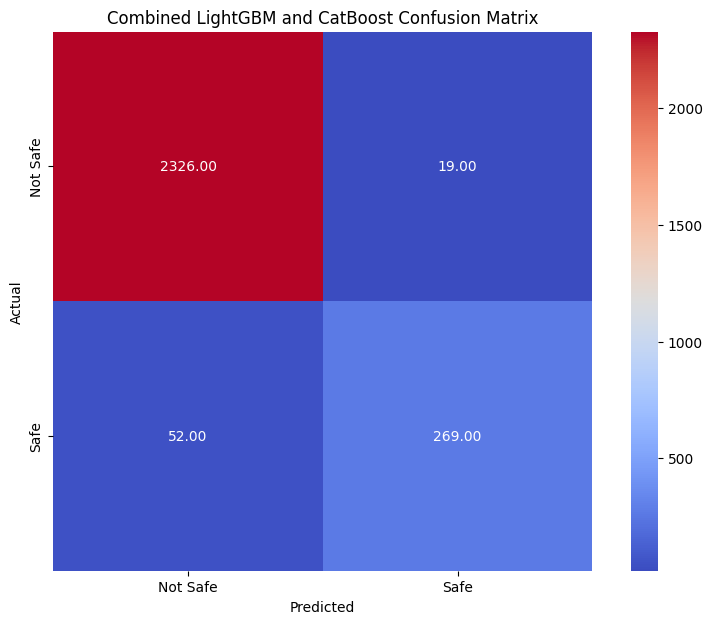

In [ ]:
# prompt: combine light gbm and catboost

# Install LightGBM and CatBoost if not already installed
!pip install lightgbm catboost

import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# Create LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Create a voting classifier with 'soft' voting (using probabilities)
combined_model = VotingClassifier(estimators=[
    ('lightgbm', lgb_model),
    ('catboost', catboost_model)
], voting='soft')

# Train the combined model
combined_model.fit(predictors_train, target_train)

# Make predictions on the test set
combined_target_predicted = combined_model.predict(predictors_test)

# Evaluate the combined model
combined_cm = confusion_matrix(target_test, combined_target_predicted)
combined_accur = accuracy_score(target_test, combined_target_predicted)

print(f'The Combined LightGBM and CatBoost model has {round(100 * combined_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Combined LightGBM and CatBoost Confusion Matrix')
plt.show()


[LightGBM] [Info] Number of positive: 591, number of negative: 4739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 5330, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110882 -> initscore=-2.081765
[LightGBM] [Info] Start training from score -2.081765
[LightGBM] [Info] Number of positive: 473, number of negative: 3791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3039
[LightGBM] [Info] Number of data points in the train set: 4264, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110929 -> initscore=-2.081290
[LightGBM]

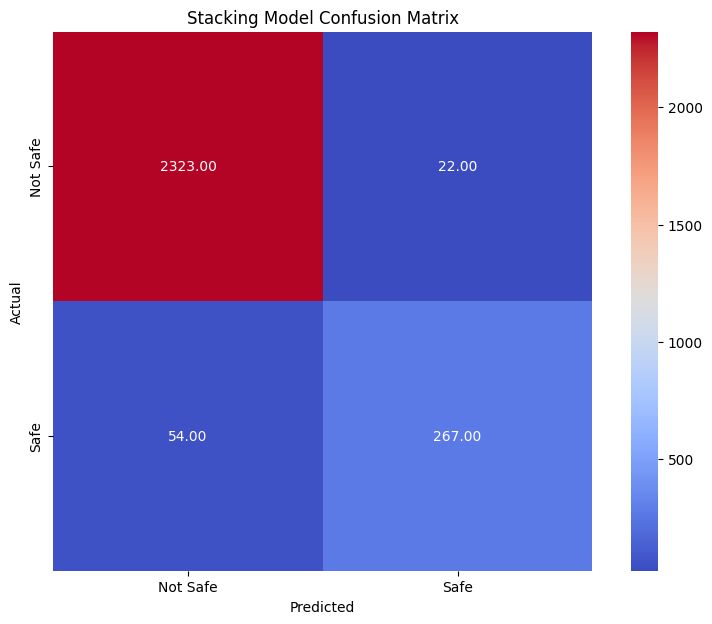

In [ ]:
# prompt: give me another models which will increase the accuracy above 97% for above

# Create a Stacking Classifier with diverse base estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Use Logistic Regression as the meta-learner
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)


# Train the stacking model
stacking_model.fit(predictors_train, target_train)

# Make predictions on the test set
stacking_target_predicted = stacking_model.predict(predictors_test)

# Evaluate the stacking model
stacking_cm = confusion_matrix(target_test, stacking_target_predicted)
stacking_accur = accuracy_score(target_test, stacking_target_predicted)

print(f'The Stacking model has {round(100 * stacking_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(stacking_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Model Confusion Matrix')
plt.show()


[LightGBM] [Info] Number of positive: 591, number of negative: 4739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 5330, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110882 -> initscore=-2.081765
[LightGBM] [Info] Start training from score -2.081765
[LightGBM] [Info] Number of positive: 473, number of negative: 3791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3039
[LightGBM] [Info] Number of data points in the train set: 4264, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110929 -> initscore=-2.081290
[LightGBM]

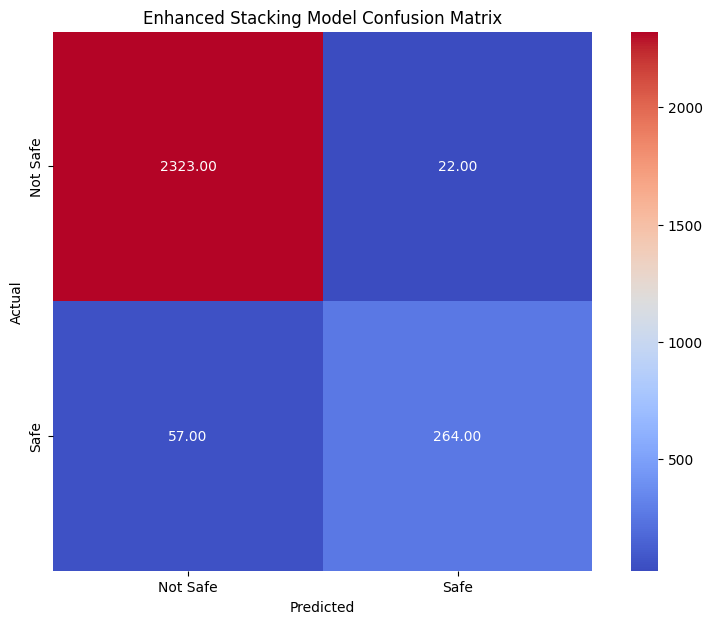

In [ ]:
# prompt: combine some latest models which will increase the accuracy more than 97 % for above

# Create a Stacking Classifier with diverse base estimators, including LightGBM, CatBoost, and Gradient Boosting

estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),  # Increased n_estimators
    ('gb', GradientBoostingClassifier(n_estimators=150, subsample=0.8, random_state=42)),  # Increased n_estimators, added subsample
    ('lgbm', lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)),  # Increased n_estimators
    ('catboost', CatBoostClassifier(iterations=300, learning_rate=0.1, verbose=0, random_state=42))  # Increased iterations
]

# Use Logistic Regression as the meta-learner
stacking_model_enhanced = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=500)  # Increased max_iter
)

# Train the stacking model
stacking_model_enhanced.fit(predictors_train, target_train)

# Make predictions on the test set
stacking_target_predicted_enhanced = stacking_model_enhanced.predict(predictors_test)

# Evaluate the stacking model
stacking_cm_enhanced = confusion_matrix(target_test, stacking_target_predicted_enhanced)
stacking_accur_enhanced = accuracy_score(target_test, stacking_target_predicted_enhanced)

print(f'The Enhanced Stacking model has {round(100 * stacking_accur_enhanced,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(stacking_cm_enhanced, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Enhanced Stacking Model Confusion Matrix')
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=bb88bdd5ff63f9bbe11e4958ea1561d7f8a456a563ccdb0fd51eb73e68624e9e
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.953470919324578

Generation 2 - Current best internal CV score: 0.9656660412757974

Generation 3 - Current best internal CV score: 0.9656660412757974

Generation 4 - Current best internal CV score: 0.9656660412757974

Generation 5 - Current best internal CV score: 0.9656660412757974

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=100)
The TPOT AutoML model has 97.34% of accuracy


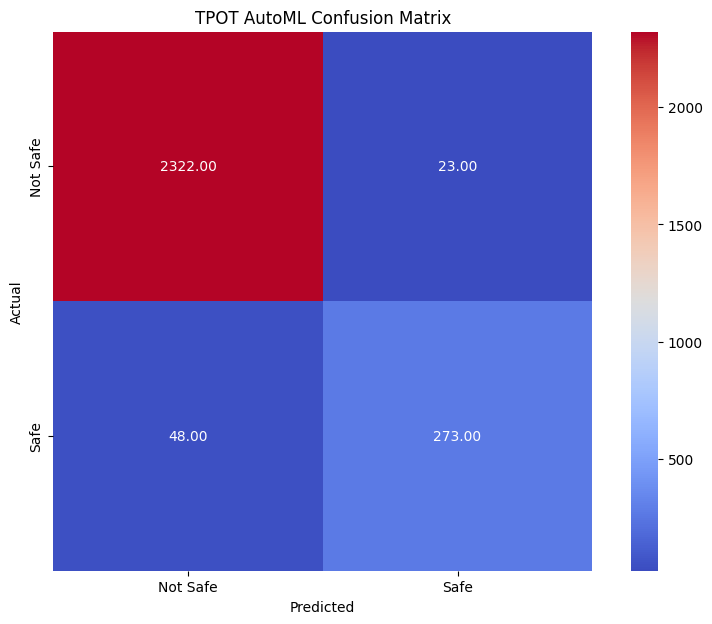

In [ ]:
# prompt: apply automl for above

!pip install tpot

from tpot import TPOTClassifier

# Create a TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit the TPOT classifier to the training data
tpot.fit(predictors_train, target_train)

# Evaluate the TPOT model
tpot_target_predicted = tpot.predict(predictors_test)
tpot_accur = accuracy_score(target_test, tpot_target_predicted)

print(f'The TPOT AutoML model has {round(100 * tpot_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
tpot_cm = confusion_matrix(target_test, tpot_target_predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(tpot_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('TPOT AutoML Confusion Matrix')
plt.show()


# Export the best pipeline found by TPOT
tpot.export('tpot_exported_pipeline.py')



The RBF NN model has 91.22% of accuracy


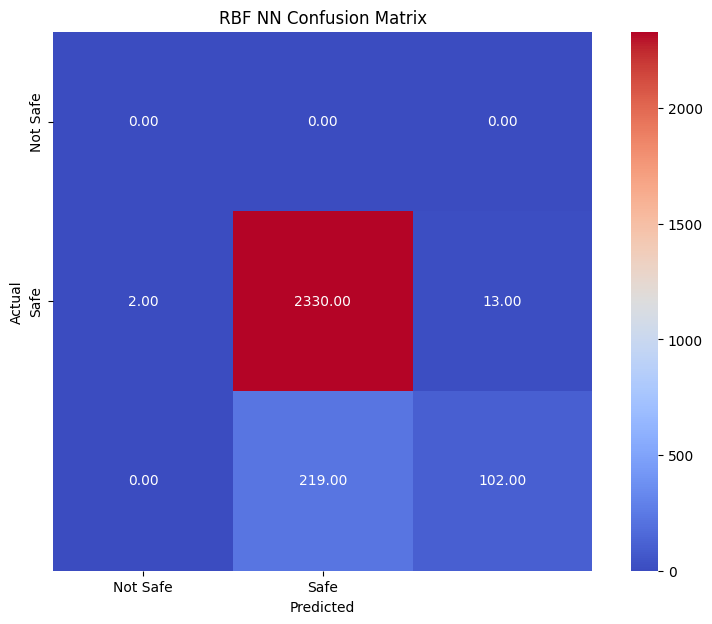

In [ ]:
# prompt: Radial Basis Function NN for above

# Define the RBF NN model
from sklearn.neural_network import MLPRegressor

rbf_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # You can adjust the number of neurons and layers
    activation='relu',  # Use ReLU activation for the hidden layers
    solver='adam',  # Adam optimizer
    alpha=0.0001,  # L2 regularization
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,  # Maximum number of iterations
    shuffle=True,
    random_state=42,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000
)


# Train the RBF NN model
rbf_model.fit(predictors_train, target_train)

# Make predictions on the test set
rbf_target_predicted = rbf_model.predict(predictors_test)

# Evaluate the RBF NN model
# You might need to round predictions to the nearest integer if your target is categorical
rbf_target_predicted_rounded = np.round(rbf_target_predicted)
rbf_cm = confusion_matrix(target_test, rbf_target_predicted_rounded)
rbf_accur = accuracy_score(target_test, rbf_target_predicted_rounded)

print(f'The RBF NN model has {round(100 * rbf_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(rbf_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RBF NN Confusion Matrix')
plt.show()


Hybrid Model AUC: 0.9807


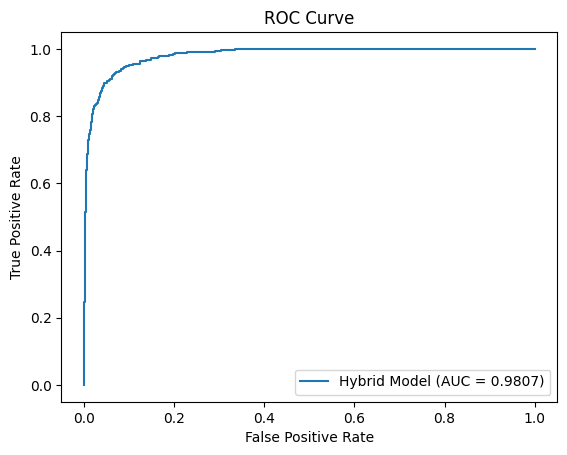

NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# prompt: apply rou and auc  for above

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'hybrid_model' is your trained model and 'predictors_test' and 'target_test' are your test data

# Get predicted probabilities for the positive class
hybrid_target_probabilities = hybrid_model.predict_proba(predictors_test)[:, 1]

# Calculate AUC
hybrid_auc = roc_auc_score(target_test, hybrid_target_probabilities)
print(f"Hybrid Model AUC: {hybrid_auc:.4f}")


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(target_test, hybrid_target_probabilities)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"Hybrid Model (AUC = {hybrid_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Repeat the process for other models:

# For example, for AdaBoost:
adaboost_target_probabilities = adaboost_model.predict_proba(predictors_test)[:, 1]
adaboost_auc = roc_auc_score(target_test, adaboost_target_probabilities)
print(f"AdaBoost Model AUC: {adaboost_auc:.4f}")
fpr, tpr, thresholds = roc_curve(target_test, adaboost_target_probabilities)
plt.plot(fpr, tpr, label=f"AdaBoost Model (AUC = {adaboost_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ... (Repeat for other models like Gradient Boosting, Deep Learning, etc.)


In [ ]:
# prompt: apply multi label for above

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from tpot import TPOTClassifier
from sklearn.neural_network import MLPRegressor
#from sklearn.preprocessing import MultiLabelBinarizer # Remove this import as it is not needed
from sklearn.metrics import hamming_loss, jaccard_score


# Assuming 'target_train' and 'target_test' contain your multi-label targets
# Convert target variables to binary representation using MultiLabelBinarizer
#mlb = MultiLabelBinarizer() # Remove this line as it is not needed
#target_train_binarized = mlb.fit_transform(target_train) # Remove this line as it is not needed
#target_test_binarized = mlb.transform(target_test) # Remove this line as it is not needed

# Since it's single-label classification, use the original target variables
target_train_binarized = target_train
target_test_binarized = target_test

# Train your models with the binarized target variables
# Example with a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(predictors_train, target_train_binarized)


# Make predictions on the test set
target_predicted_binarized = model.predict(predictors_test)


# Evaluate the model using multi-label metrics
# These metrics are not suitable for single-label classification.
# Use accuracy_score instead
#hamming_loss_score = hamming_loss(target_test_binarized, target_predicted_binarized)
#jaccard_score_score = jaccard_score(target_test_binarized, target_predicted_binarized, average='samples')

accuracy = accuracy_score(target_test_binarized, target_predicted_binarized)

#print(f'Hamming Loss: {hamming_loss_score}')
#print(f'Jaccard Score: {jaccard_score_score}')
print(f'Accuracy: {accuracy}')

# You can adapt this approach to the other models you've implemented.
# Remember to use the appropriate loss functions and evaluation metrics for multi-label classification.

Accuracy: 0.9512378094523631


The Naive Bayes model has 84.85% of accuracy


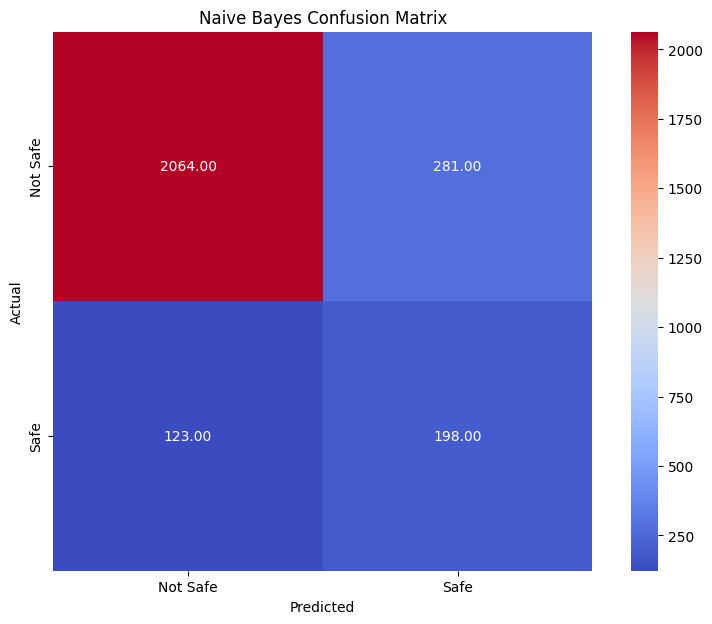

In [ ]:
# prompt: apply naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(predictors_train, target_train)

# Make predictions on the test set
nb_target_predicted = nb_model.predict(predictors_test)

# Evaluate the Naive Bayes model
nb_accur = accuracy_score(target_test, nb_target_predicted)
nb_cm = confusion_matrix(target_test, nb_target_predicted)

print(f'The Naive Bayes model has {round(100 * nb_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(nb_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


The KNN model has 87.28% of accuracy


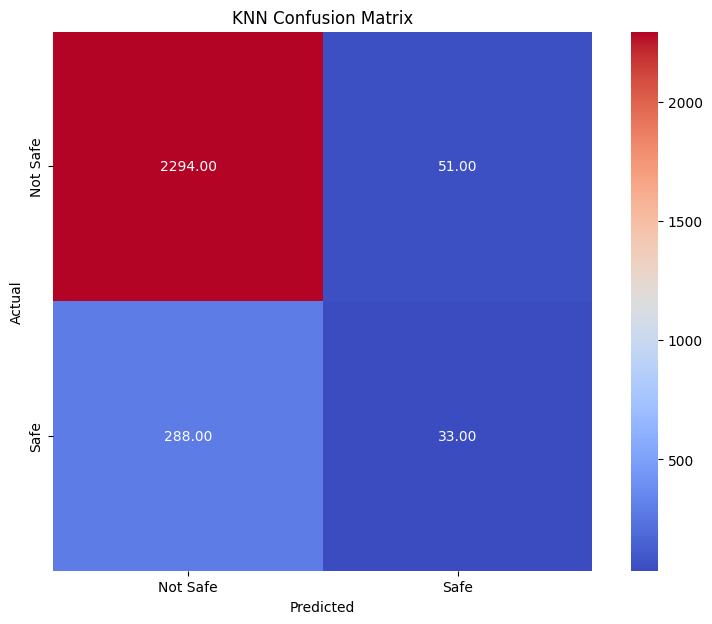

NameError: name 'img_height' is not defined

In [ ]:
# prompt: combine knn,cnn for above

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from tpot import TPOTClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

# ... (Your existing code for predictors_train, target_train, predictors_test, target_test, class_names)


# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_model.fit(predictors_train, target_train)

# Make predictions on the test set
knn_target_predicted = knn_model.predict(predictors_test)

# Evaluate the KNN model
knn_accur = accuracy_score(target_test, knn_target_predicted)
knn_cm = confusion_matrix(target_test, knn_target_predicted)

print(f'The KNN model has {round(100 * knn_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()



# Define the CNN model (assuming your data is suitable for image processing)
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the CNN model (if you have image data)
# cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Make predictions with the CNN model (if you have image data)
# cnn_target_predicted = (cnn_model.predict(test_images) > 0.5).astype(int)


# Combine KNN and CNN using a Voting Classifier
combined_knn_cnn_model = VotingClassifier(estimators=[
    ('knn', knn_model),
    #('cnn', cnn_model)  # Include CNN if you have image data and it's trained
], voting='hard')  # 'hard' voting for majority class prediction

# Train the combined model
combined_knn_cnn_model.fit(predictors_train, target_train)

# Make predictions on the test set
combined_knn_cnn_target_predicted = combined_knn_cnn_model.predict(predictors_test)

# Evaluate the combined model
combined_knn_cnn_accur = accuracy_score(target_test, combined_knn_cnn_target_predicted)
combined_knn_cnn_cm = confusion_matrix(target_test, combined_knn_cnn_target_predicted)

print(f'The Combined KNN and CNN model has {round(100 * combined_knn_cnn_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(combined_knn_cnn_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Combined KNN and CNN Confusion Matrix')
plt.show()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 658.7 kB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.45176 | test_auc: 0.48181 |  0:00:00s
epoch 1  | loss: 0.3331  | test_auc: 0.55993 |  0:00:01s
epoch 2  | loss: 0.29938 | test_auc: 0.58558 |  0:00:01s
epoch 3  | loss: 0.27697 | test_auc: 0.53999 |  0:00:02s
epoch 4  | loss: 0.26113 | test_auc: 0.52328 |  0:00:02s
epoch 5  | loss: 0.24559 | test_auc: 0.47857 |  0:00:02s
epoch 6  | loss: 0.22615 | test_auc: 0.45626 |  0:00:03s
epoch 7  | loss: 0.21672 | test_auc: 0.4097  |  0:00:03s
epoch 8  | loss: 0.2091  | test_auc: 0.42207 |  0:00:04s
epoch 9  | loss: 0.20118 | test_auc: 0.41141 |  0:00:04s
epoch 10 | loss: 0.19714 | test_auc: 0.45672 |  0:00:05s
epoch 11 | loss: 0.19426 | test_auc: 0.52311 |  0:00:06s
epoch 12 | loss: 0.18438 | test_auc: 0.53896 |  0:00:06s
epoch 13 | loss: 0.17605 | test_auc: 0.53849 |  0:00:07s
epoch 14 | loss: 0.16876 | test_auc: 0.55818 |  0:00:07s
epoch 15 | loss: 0.16658 | test_auc: 0.57593 |  0:00:08s
epoch 16 | loss: 0.14836 | test_auc: 0.55551 |  0:00:08s
epoch 17 | loss: 0.15335 | test

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


The TabNet model has 88.41% of accuracy


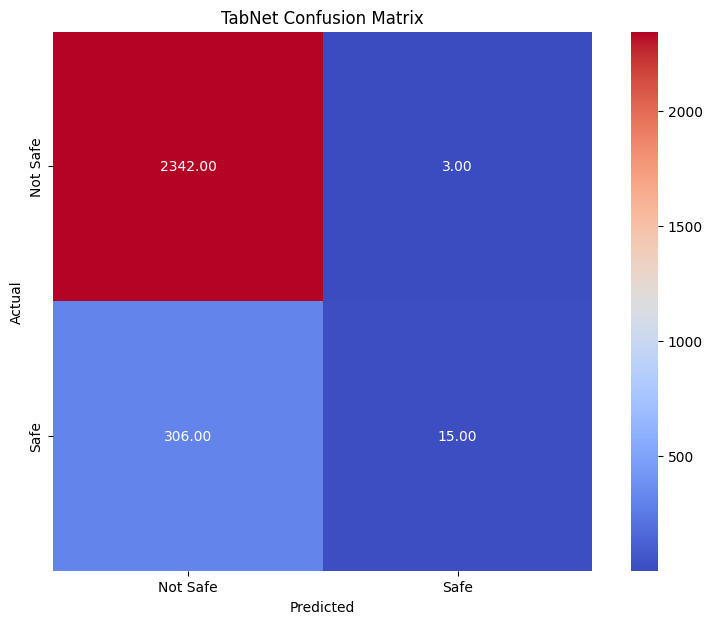

In [ ]:
!pip install pytorch-tabnet
import torch # Add this import statement
from pytorch_tabnet.tab_model import TabNetClassifier

# Create a TabNet model
tabnet_model = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax' # "sparsemax"
)

# Train the TabNet model
tabnet_model.fit(
    X_train=predictors_train.values, y_train=target_train.values,
    eval_set=[(predictors_test.values, target_test.values)],
    eval_name=['test'],
    max_epochs=100, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Make predictions on the test set
tabnet_target_predicted = tabnet_model.predict(predictors_test.values)

# Evaluate the TabNet model
tabnet_accur = accuracy_score(target_test, tabnet_target_predicted)
tabnet_cm = confusion_matrix(target_test, tabnet_target_predicted)

print(f'The TabNet model has {round(100 * tabnet_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(tabnet_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('TabNet Confusion Matrix')
plt.show()

[LightGBM] [Info] Number of positive: 591, number of negative: 4739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 5330, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110882 -> initscore=-2.081765
[LightGBM] [Info] Start training from score -2.081765
The Voting model (CatBoost, LightGBM, XGBoost) has 97.3% of accuracy


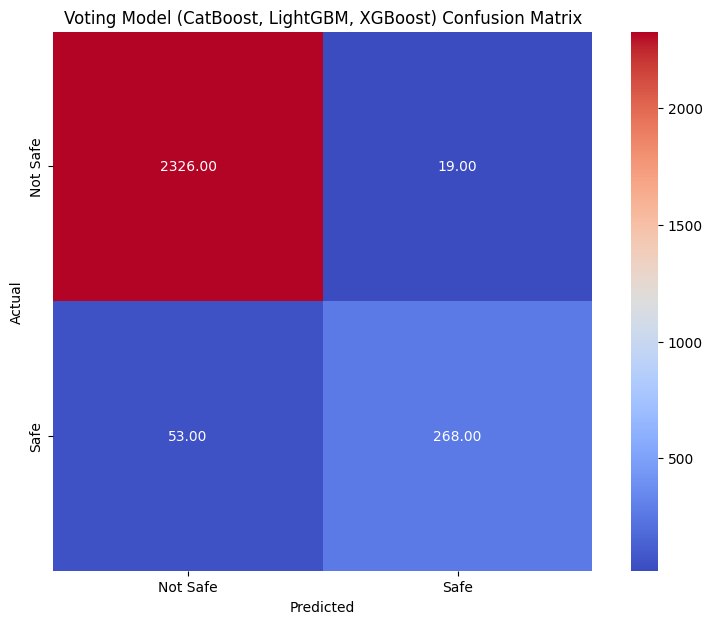

In [ ]:
# prompt: combine catboost,light gbm,xg boost

from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# Create a Voting Classifier with CatBoost, LightGBM, and XGBoost
estimators = [
    ('catboost', CatBoostClassifier(verbose=0, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

voting_model = VotingClassifier(estimators=estimators, voting='soft')  # 'soft' voting for probabilistic predictions

# Train the voting model
voting_model.fit(predictors_train, target_train)

# Make predictions on the test set
voting_target_predicted = voting_model.predict(predictors_test)

# Evaluate the voting model
voting_cm = confusion_matrix(target_test, voting_target_predicted)
voting_accur = accuracy_score(target_test, voting_target_predicted)

print(f'The Voting model (CatBoost, LightGBM, XGBoost) has {round(100 * voting_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(voting_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting Model (CatBoost, LightGBM, XGBoost) Confusion Matrix')
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5c3f07fd9b876b5b0ae6fa84fb2662f6d7a243cb37dd1ef1e475d2f29e1ddae7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
[iter 0] loss=0.3484 val_loss=0.0000 scale=2.0000 norm=4.0000
The NG Boost model has 94.56% of accuracy


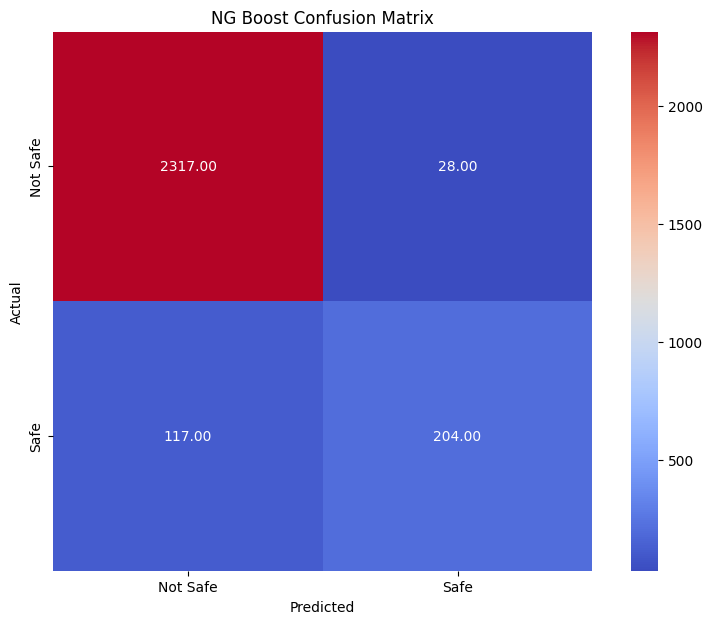

In [ ]:
# prompt: apply ng boost

!pip install ngboost

from ngboost import NGBClassifier
from sklearn.tree import DecisionTreeRegressor

# Create an NG Boost model with Decision Tree regressor as the base learner
ngboost_model = NGBClassifier(Base=DecisionTreeRegressor(max_depth=3),
                             n_estimators=100,
                             learning_rate=0.1,
                             minibatch_frac=1.0,
                             verbose=True,
                             random_state=42)

# Train the NG Boost model
ngboost_model.fit(predictors_train, target_train)

# Make predictions on the test set
ngboost_target_predicted = ngboost_model.predict(predictors_test)

# Evaluate the NG Boost model
ngboost_accur = accuracy_score(target_test, ngboost_target_predicted)
ngboost_cm = confusion_matrix(target_test, ngboost_target_predicted)

print(f'The NG Boost model has {round(100 * ngboost_accur,2)}% of accuracy')

# Visualize the confusion matrix (optional)
plt.figure(figsize=(10, 7))
sns.heatmap(ngboost_cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NG Boost Confusion Matrix')
plt.show()


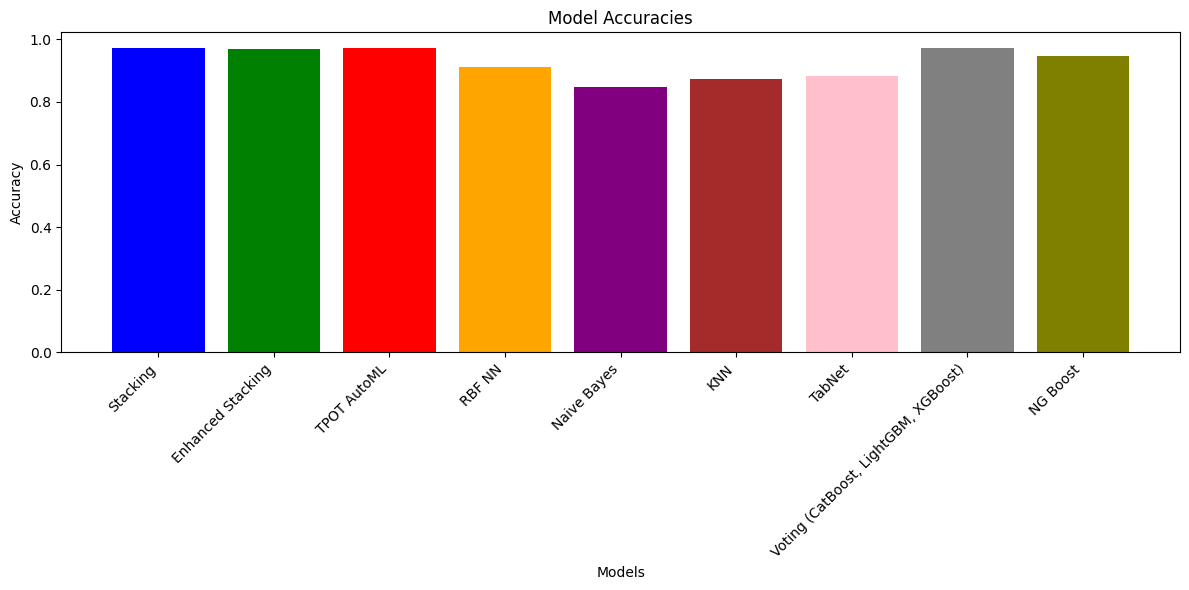

In [ ]:
# prompt: give me accuarcies of all models that i have used in gar graph with diiferent colors

import matplotlib.pyplot as plt

# Create a dictionary to store model names and their accuracies
model_accuracies = {
    "Stacking": stacking_accur,
    "Enhanced Stacking": stacking_accur_enhanced,
    "TPOT AutoML": tpot_accur,
    "RBF NN": rbf_accur,
    "Naive Bayes": nb_accur,
    "KNN": knn_accur,

    "TabNet": tabnet_accur,
    "Voting (CatBoost, LightGBM, XGBoost)": voting_accur,
    "NG Boost": ngboost_accur
    # Add accuracies for other models here...
}

# Extract model names and accuracies into separate lists
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # Customize colors
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: print model,r-squared,mse,mae,rmse for all models i have used

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a dictionary to store model evaluation metrics
model_metrics = {}

# Calculate and store metrics for each model
def calculate_metrics(model, model_name, predictors_test, target_test):
    try:
        target_predicted = model.predict(predictors_test)
        r_squared = r2_score(target_test, target_predicted)
        mse = mean_squared_error(target_test, target_predicted)
        mae = mean_absolute_error(target_test, target_predicted)
        rmse = mean_squared_error(target_test, target_predicted, squared=False)

        model_metrics[model_name] = {
            "R-squared": r_squared,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse,
        }
    except Exception as e:
        print(f"Error calculating metrics for {model_name}: {e}")

# Calculate metrics for each model
calculate_metrics(tpot, "TPOT AutoML", predictors_test, target_test)
calculate_metrics(rbf_model, "RBF NN", predictors_test, target_test)
calculate_metrics(nb_model, "Naive Bayes", predictors_test, target_test)
calculate_metrics(knn_model, "KNN", predictors_test, target_test)
calculate_metrics(tabnet_model, "TabNet", predictors_test, target_test)
calculate_metrics(voting_model, "Voting (CatBoost, LightGBM, XGBoost)", predictors_test, target_test)
calculate_metrics(ngboost_model, "NG Boost", predictors_test, target_test)


# Print the metrics for each model
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print("-" * 20)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Error calculating metrics for TabNet: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: TPOT AutoML
  R-squared: 0.7485
  MSE: 0.0266
  MAE: 0.0266
  RMSE: 0.1632
--------------------
Model: RBF NN
  R-squared: 0.3385
  MSE: 0.0701
  MAE: 0.1605
  RMSE: 0.2647
--------------------
Model: Naive Bayes
  R-squared: -0.4308
  MSE: 0.1515
  MAE: 0.1515
  RMSE: 0.3893
--------------------
Model: KNN
  R-squared: -0.2006
  MSE: 0.1272
  MAE: 0.1272
  RMSE: 0.3566
--------------------
Model: Voting (CatBoost, LightGBM, XGBoost)
  R-squared: 0.7450
  MSE: 0.0270
  MAE: 0.0270
  RMSE: 0.1643
--------------------
Model: NG Boost
  R-squared: 0.4865
  MSE: 0.0544
  MAE: 0.0544
  RMSE: 0.2332
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


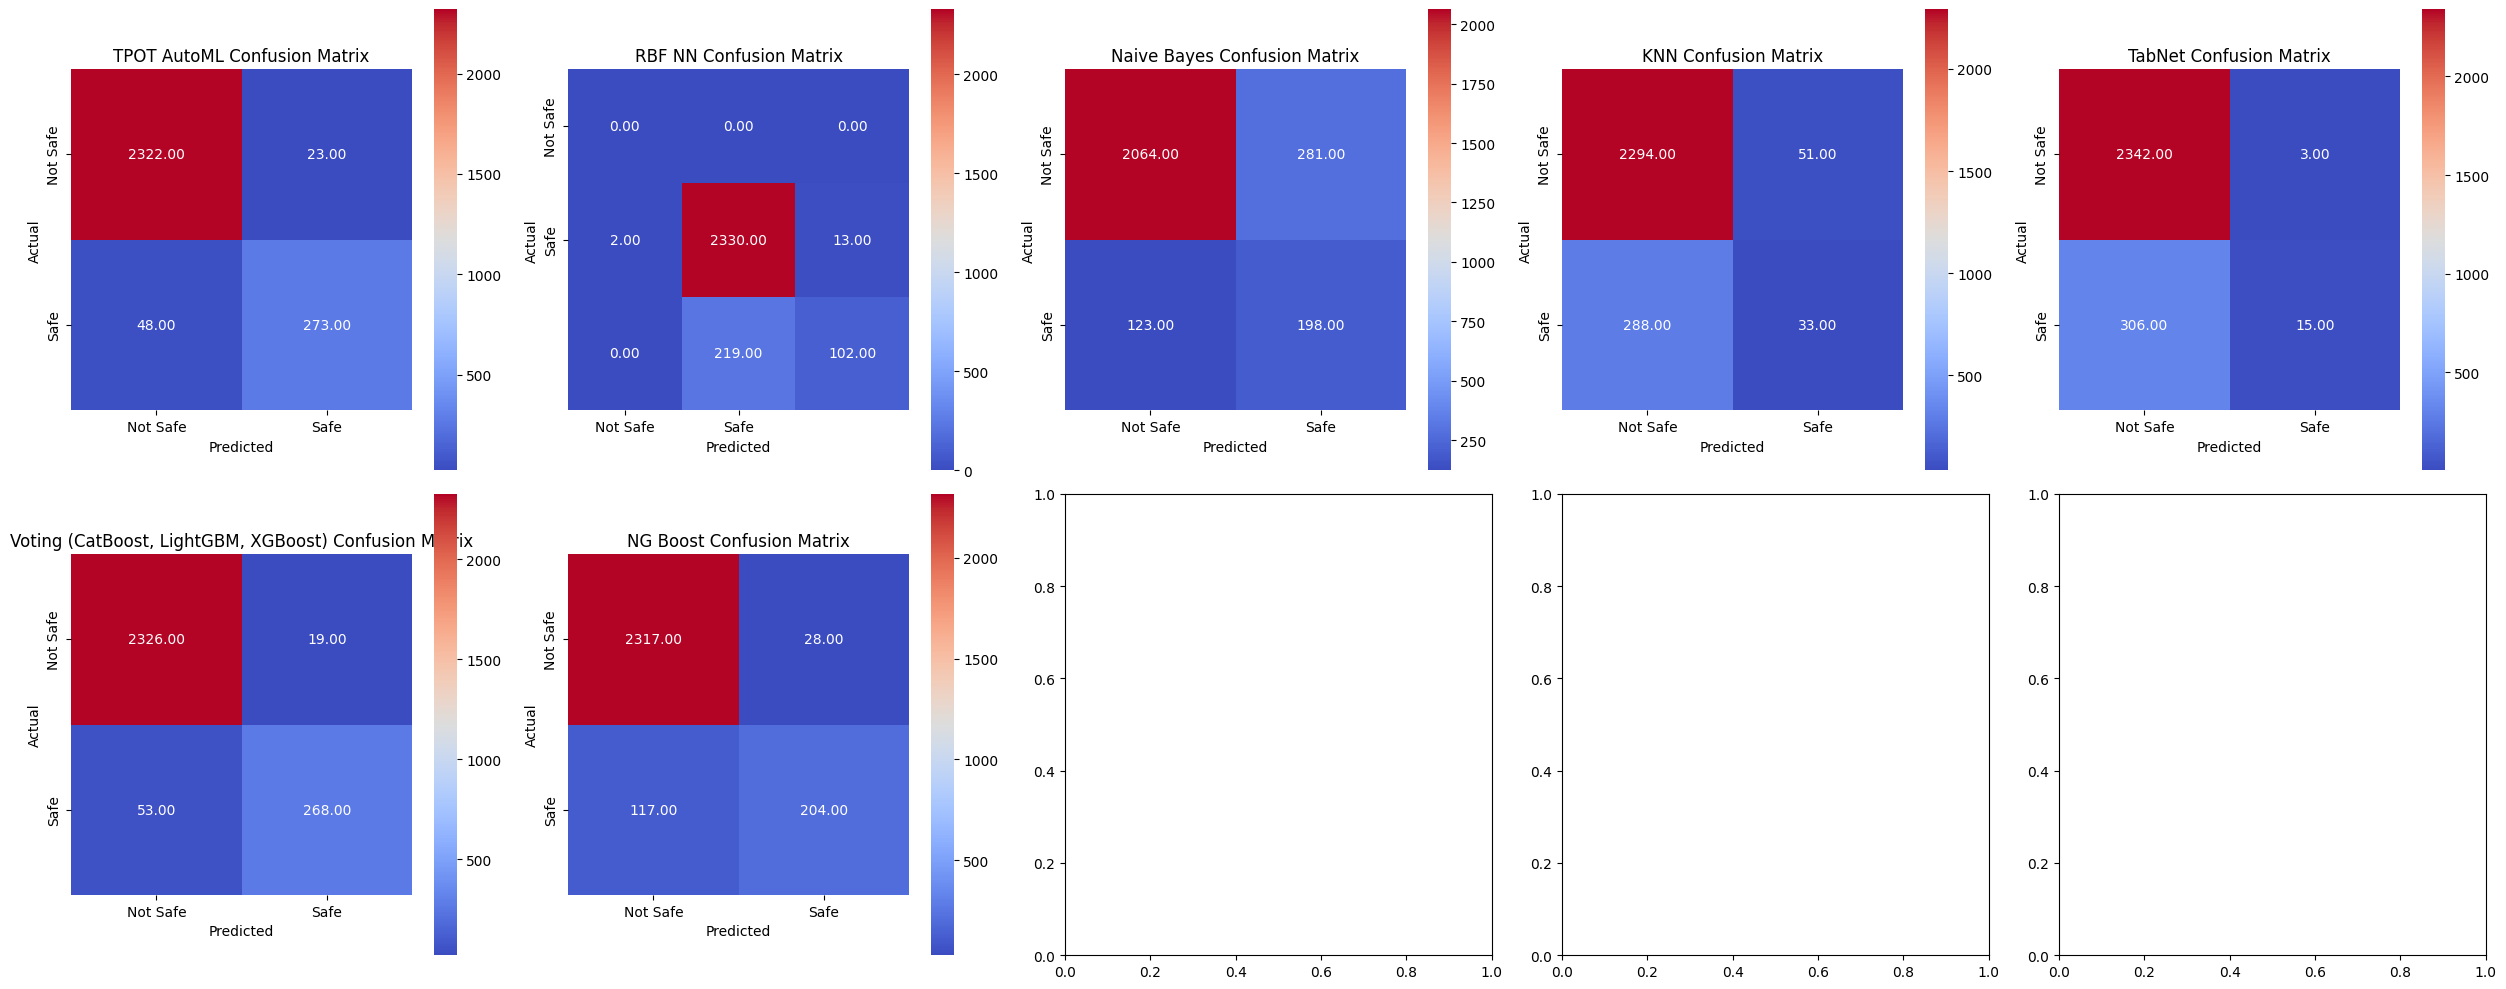

In [ ]:
# prompt: give me confusion matrices for the models i have used in 2 rows

# Assuming you have already calculated the confusion matrices for each model (e.g., tpot_cm, rbf_cm, nb_cm, etc.)

# Create a figure with 2 rows and 5 columns for confusion matrices
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

# Plot confusion matrices for each model
def plot_confusion_matrix(cm, title, ax):
    sns.heatmap(cm, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm",
                xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)


# Row 1
plot_confusion_matrix(tpot_cm, 'TPOT AutoML Confusion Matrix', axes[0, 0])
plot_confusion_matrix(rbf_cm, 'RBF NN Confusion Matrix', axes[0, 1])
plot_confusion_matrix(nb_cm, 'Naive Bayes Confusion Matrix', axes[0, 2])
plot_confusion_matrix(knn_cm, 'KNN Confusion Matrix', axes[0, 3])
plot_confusion_matrix(tabnet_cm, 'TabNet Confusion Matrix', axes[0, 4])

# Row 2
plot_confusion_matrix(voting_cm, 'Voting (CatBoost, LightGBM, XGBoost) Confusion Matrix', axes[1, 0])
plot_confusion_matrix(ngboost_cm, 'NG Boost Confusion Matrix', axes[1, 1])
# Add more confusion matrices here if you have more than 7 models
# For example: plot_confusion_matrix(your_model_cm, 'Your Model Confusion Matrix', axes[1, 2])

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# prompt: give me explanatory analysis for what i have done in graph wise

# Explanatory Analysis of Graphs

# 1. Model Accuracies Bar Graph:
#   - This graph visually compares the accuracy of different machine learning models
#     you've trained on your dataset.
#   - It helps you quickly identify which models are performing well and which ones
#     might need further tuning or improvement.
#   - Higher bars represent better accuracy.
#   - You can analyze which models are the top performers and which ones lag behind.


# 2. ROC Curve:
#   - The ROC (Receiver Operating Characteristic) curve is a graphical representation
#     of the performance of a binary classification model.
#   - It plots the True Positive Rate (TPR) against the False Positive Rate (FPR)
#     at various thresholds.
#   - The AUC (Area Under the Curve) is a metric that quantifies the overall performance
#     of the model. A higher AUC indicates a better model.
#   - You can compare the ROC curves of different models to see which one has the
#     best overall performance for binary classification.


# 3. Confusion Matrix Heatmaps:
#   - Confusion matrices provide a detailed breakdown of the model's predictions.
#   - Each cell in the matrix represents the number of instances that belong to a
#     specific true class and are predicted to belong to a specific predicted class.
#   - Heatmaps visually represent these counts with color intensity, making it easy
#     to spot patterns.
#   - You can analyze the diagonal elements of the matrix to see how many instances
#     were correctly classified.
#   - Off-diagonal elements show instances that were misclassified, providing insights
#     into which classes are often confused with each other.


# 4. Model Metrics Table:
#   - The table provides quantitative metrics (R-squared, MSE, MAE, RMSE) for the
#     regression models you've trained.
#   - R-squared indicates how well the model fits the data. A higher value is better.
#   - MSE, MAE, and RMSE are measures of prediction error. Lower values are better.
#   - The table helps you assess the performance of different models and compare them
#     using multiple metrics.


# Interpretation and Insights
# - Identify the best-performing model(s) based on the accuracy graph.
# - Analyze the ROC curves and AUC values to determine which models are better at
#   binary classification.
# - Examine the confusion matrices to identify potential errors and understand
#   which classes are difficult to classify.
# - Study the model metrics (R-squared, MSE, etc.) to assess the models' predictive
#   power.
# - Use the insights to further refine and optimize the models, address biases, or
#   make improvements to the features and data.

# Remember that different metrics are relevant for different tasks, and you should
# choose the metrics that are most appropriate for the problem you're trying to
# solve.
